In [14]:
import numpy as np
import pandas as pd
import csv

mylist= pd.read_csv("new_total.csv")

print(mylist)

              Time  Length
0         0.000000      96
1         0.000000    1472
2         0.000000     100
3         0.000000    1476
4         0.002025    1472
...            ...     ...
583709  115.710576    1400
583710  115.710578    1396
583711  115.710578    1400
583712  115.711664      75
583713  115.711664      79

[583714 rows x 2 columns]


In [15]:
count= len(mylist)
print("Package number: ", count)

Package number:  583714


In [16]:
time= mylist.iloc[583713]["Time"]
print("Time: ", time)

Time:  115.71166399999998


In [17]:
avg_count= count/time # This is λ value
print("Average packet count per time unit: ", avg_count, " packet/s")

Average packet count per time unit:  5044.55626876129  packet/s


In [19]:
total_length= mylist["Length"].sum()
print("Total packet length: ", total_length, " bytes")
avg_length= total_length/count # This is L value
print("Average packet length: ", avg_length, " bytes")

Total packet length:  812828040  bytes
Average packet length:  1392.510784390986  bytes


In [21]:
print("C should be larger than: ", avg_count * 8 * avg_length / 131072)

link_capacity_array= []
avg_delay_array= []
loop_count= 0

for C_in_Mbps in range(429, 460): # This is C value in Mbps
    link_capacity_array.append(C_in_Mbps)
    link_capacity= C_in_Mbps * 131072; # Convert to byte per second
    link_uti= 8 * avg_count * avg_length / link_capacity
    avg_delay= (8 * avg_length / link_capacity) / (1 - (8 * avg_count * avg_length / link_capacity)) # T = h/(1-ρ) = 8×L/C/(1-8×λ×L/C)
    avg_delay_array.append(avg_delay)
    loop_count= loop_count + 1

for i in range(0, loop_count):
    print("C: ", link_capacity_array[i], end=" Mbps, ")
    print("T: ", avg_delay_array[i], "s")

C should be larger than:  428.7474979685821
C:  429 Mbps, T:  0.3365997209124978 s
C:  430 Mbps, T:  0.06785786463667179 s
C:  431 Mbps, T:  0.03773231372031803 s
C:  432 Mbps, T:  0.02613130214343394 s
C:  433 Mbps, T:  0.019986378061005772 s
C:  434 Mbps, T:  0.01618126233873544 s
C:  435 Mbps, T:  0.0135932963920749 s
C:  436 Mbps, T:  0.011719005790956957 s
C:  437 Mbps, T:  0.010298950909862535 s
C:  438 Mbps, T:  0.009185851893521736 s
C:  439 Mbps, T:  0.008289889925860336 s
C:  440 Mbps, T:  0.0075531746688699995 s
C:  441 Mbps, T:  0.006936714891960575 s
C:  442 Mbps, T:  0.0064132880797619736 s
C:  443 Mbps, T:  0.005963311783275592 s
C:  444 Mbps, T:  0.005572339090992578 s
C:  445 Mbps, T:  0.005229478706774784 s
C:  446 Mbps, T:  0.004926364486167732 s
C:  447 Mbps, T:  0.004656463708855775 s
C:  448 Mbps, T:  0.004414600926488216 s
C:  449 Mbps, T:  0.004196622875201525 s
C:  450 Mbps, T:  0.00399915798993778 s
C:  451 Mbps, T:  0.0038194407615429024 s
C:  452 Mbps, T:  0

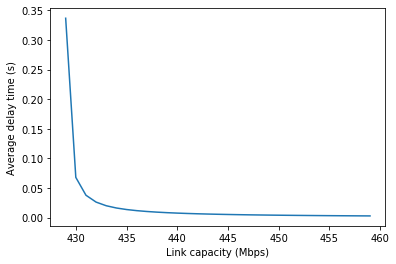

In [22]:
import matplotlib.pyplot as plt
plt.plot(link_capacity_array, avg_delay_array)
plt.xlabel("Link capacity (Mbps)")
plt.ylabel("Average delay time (s)")
plt.show()